In [206]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
shows = pd.read_csv('good_shows_data2.csv')

In [24]:
pd.set_option('max_seq_items', 200)

In [25]:
shows.shape

(2515, 168)

In [26]:
## dropping old shows
shows = shows[shows['release_date']>=1980]

In [27]:
## dropping shows where I don't know whether they were cancelled
shows = shows[shows['seasons'] != 0]

In [28]:
shows.shape

(2061, 168)

In [29]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords',
       u'first_year', u'is_new', u'fixed_runtime', u'is_action',
       u'is_adventure', u'is_animation', u'is_biography', u'is_comedy',
       u'is_crime', u'is_documentary', u'is_drama', u'is_family',
       u'is_fantasy', u'is_game', u'is_history', u'is_horror', u'is_music',
       u'is_musical', u'is_mystery', u'is_news', u'is_reality', u'is_romance',
       u'is_sci', u'is_short', u'is_sport', u'is_talk', u'is_thriller',
       u'is_war', u'is_western', u'release_month', u'release_weekday',
       u'release_monthday', u'stemmed_plot', u'stemmed_keywords',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keywor

In [30]:
shows.dtypes

json                  object
title_rough           object
check                  int64
title                 object
imdb_id               object
big_json              object
seasons                int64
cancelled              int64
runtime               object
genres                object
imdb_rating          float64
release_date          object
plot                  object
year                  object
type                  object
votes                 object
keywords              object
first_year             int64
is_new                 int64
fixed_runtime        float64
is_action              int64
is_adventure           int64
is_animation           int64
is_biography           int64
is_comedy              int64
is_crime               int64
is_documentary         int64
is_drama               int64
is_family              int64
is_fantasy             int64
                      ...   
from_CBS               int64
from_Fox               int64
from_Nickelodeon       int64
from_Cartoon  

In [31]:
shows = shows.drop(['json', u'title_rough', u'check', u'title', 'imdb_id', u'big_json',
       u'seasons', 'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords', u'is_new', 
        'stemmed_plot', u'stemmed_keywords', 'plot_cleaned', u'network'], axis=1)

In [34]:
shows.drop('fixed_runtime', inplace=True, axis=1)

In [39]:
shows.drop('keyword_new', inplace=True, axis=1)

In [35]:
shows.shape

(2061, 146)

In [40]:
shows.columns

Index([u'cancelled', u'first_year', u'is_action', u'is_adventure',
       u'is_animation', u'is_biography', u'is_comedy', u'is_crime',
       u'is_documentary', u'is_drama', u'is_family', u'is_fantasy', u'is_game',
       u'is_history', u'is_horror', u'is_music', u'is_musical', u'is_mystery',
       u'is_news', u'is_reality', u'is_romance', u'is_sci', u'is_short',
       u'is_sport', u'is_talk', u'is_thriller', u'is_war', u'is_western',
       u'release_month', u'release_weekday', u'release_monthday',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keyword_boy',
       u'keyword_boyfriend', u'keyword_brother', u'keyword_california',
       u'keyword_celebr', u'keyword_charact', u'keyword_child',
       u'keyword_citi', u'keyword_comedi', u'keyword_comedian',
       u'keyword_comic', u'keyword_cult', u'keyword_daughter',
       u'key

In [37]:
shows.shape

(2061, 146)

In [38]:
shows.dropna().shape

(2061, 146)

In [41]:
## defining dependent/independent variables
y = shows['cancelled']
x = shows.drop('cancelled', axis=1)

In [88]:
## Base probability
y.mean()

0.39349830179524503

In [42]:
## splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [51]:
x_train.shape

(1545, 144)

In [52]:
x_test.shape

(516, 144)

In [53]:
y_train.shape

(1545,)

In [54]:
y_test.shape

(516,)

In [84]:
## runs model
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print "Training set score: ", model.score(x_train, y_train)
    print "Test set score: ", model.score(x_test, y_test)
    predictions = model.predict(x_test)
    print "\nConfusion Matrix:\n", confusion_matrix(y_test, predictions), "\n"
    print "Classification Report:\n",classification_report(y_test, predictions)

In [100]:
## plots ROC curve
def plot_roc(x_test, y_test, model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [43]:
rf = RandomForestClassifier()

In [65]:
run_model(x_train, y_train, x_test, y_test, rf)

Training set score:  0.981877022654
Test set score:  0.643410852713

Confusion Matrix:
[[263  54]
 [130  69]]


             precision    recall  f1-score   support

          0       0.67      0.83      0.74       317
          1       0.56      0.35      0.43       199

avg / total       0.63      0.64      0.62       516



In [95]:
rf.predict_proba(x_test)

array([[ 0.7,  0.3],
       [ 0.4,  0.6],
       [ 1. ,  0. ],
       ..., 
       [ 0.5,  0.5],
       [ 0.4,  0.6],
       [ 0.9,  0.1]])

ROC AUC: 0.65


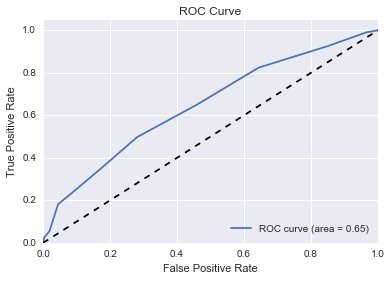

In [101]:
plot_roc(x_test, y_test, rf)

## Random Forest with grid search

In [111]:
parameters = {
    "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [5,7,10,15],
    "max_features" : [0.25, 0.5, 0.75],
    "min_samples_leaf" : [2,4]
}

In [114]:
gs_rf = RandomForestClassifier()
grid_search = GridSearchCV(gs_rf,param_grid=parameters, cv=7, n_jobs=-1)

In [115]:
## 12:21 - 12:22
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_features': [0.25, 0.5, 0.75], 'max_depth': [5, 7, 10, 15], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [117]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.25, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
run_model(x_train, y_train, x_test, y_test, grid_search.best_estimator_)

Training set score:  0.851779935275
Test set score:  0.703488372093

Confusion Matrix:
[[280  37]
 [116  83]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.71      0.88      0.79       317
          1       0.69      0.42      0.52       199

avg / total       0.70      0.70      0.68       516



ROC AUC: 0.75


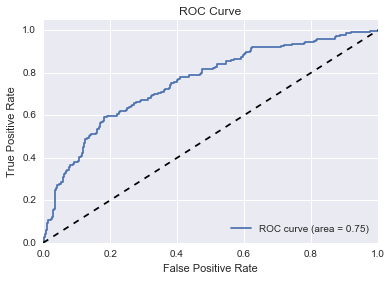

In [119]:
plot_roc(x_test, y_test, grid_search.best_estimator_)

In [148]:
grid_search.best_estimator_.predict_proba(x_test)

array([[ 0.63662594,  0.36337406],
       [ 0.52271847,  0.47728153],
       [ 0.64042652,  0.35957348],
       ..., 
       [ 0.57551721,  0.42448279],
       [ 0.41865311,  0.58134689],
       [ 0.66359584,  0.33640416]])

In [ ]:
## ^^ write a function that will iterate over these and reclassify them based on a new cutoff

## Decision Tree

In [131]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [146]:
## tune hyperparameters here
dt = DecisionTreeClassifier(
    max_depth=15, 
    min_samples_leaf=4,
    max_leaf_nodes=8
)

In [147]:
run_model(x_train, y_train, x_test, y_test, dt)

Training set score:  0.663430420712
Test set score:  0.65503875969

Confusion Matrix:
[[283  34]
 [144  55]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.66      0.89      0.76       317
          1       0.62      0.28      0.38       199

avg / total       0.65      0.66      0.61       516



In [200]:
confusion_matrix(y_test, predictions_60)

array([[283,  34],
       [144,  55]])

ROC AUC: 0.64


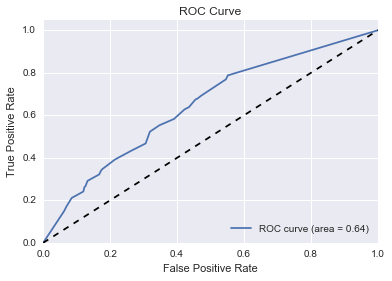

In [128]:
plot_roc(x_test, y_test, dt)

In [225]:
def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", confusion_matrix(y_test, new_predictions), "\n"
    print "Classification Report:\n", classification_report(y_test, new_predictions)

In [204]:
predictions_30 = tune_predictions(dt, x_test, .30)

(array([   7.,    0.,  200.,   17.,   17.,  186.,    0.,    0.,    0.,   89.]),
 array([ 0.125     ,  0.17825342,  0.23150685,  0.28476027,  0.3380137 ,
         0.39126712,  0.44452055,  0.49777397,  0.5510274 ,  0.60428082,
         0.65753425]),
 <a list of 10 Patch objects>)

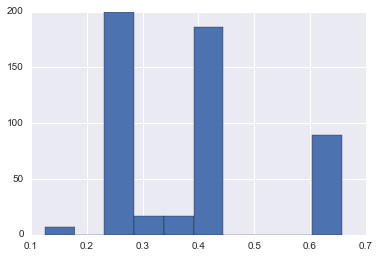

In [198]:
plt.hist(predict[:,1])

([array([   0.,    0.,   89.,    0.,    0.,  186.,   17.,   61.,  156.,    7.]),
  array([   7.,  156.,   61.,   17.,  186.,    0.,    0.,   89.,    0.,    0.])],
 array([ 0.125,  0.2  ,  0.275,  0.35 ,  0.425,  0.5  ,  0.575,  0.65 ,
         0.725,  0.8  ,  0.875]),
 <a list of 2 Lists of Patches objects>)

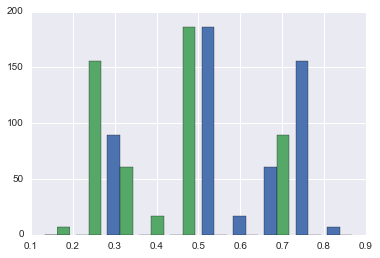

In [222]:
plt.hist(predict)

(array([ 427.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   89.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

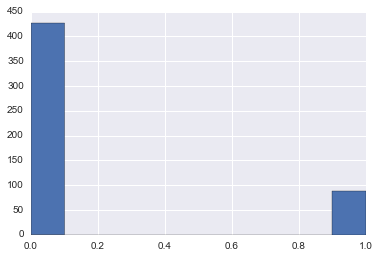

In [178]:
plt.hist(predictions_60)

In [176]:
predictions_60

[]

In [199]:
confusion_matrix(y_test, predictions_60)

array([[283,  34],
       [144,  55]])

In [226]:
tune_predictions(dt, x_test, y_test, .30)

Confusion Matrix:
[[159 158]
 [ 48 151]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.77      0.50      0.61       317
          1       0.49      0.76      0.59       199

avg / total       0.66      0.60      0.60       516



In [227]:
tune_predictions(dt, x_test, y_test, .40)

Confusion Matrix:
[[176 141]
 [ 65 134]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.56      0.63       317
          1       0.49      0.67      0.57       199

avg / total       0.64      0.60      0.61       516



## Gradient Boosting

In [228]:
GradientBoostingClassifier?

In [211]:
GradientBoostingClassifier()

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [219]:
boost_default = GradientBoostingClassifier()

In [229]:
boost = GradientBoostingClassifier(
    n_estimators=500, 
    max_depth= 6,
    learning_rate= 0.1, 
    min_samples_leaf=2
    )

In [230]:
run_model(x_train, y_train, x_test, y_test, boost)

Training set score:  1.0
Test set score:  0.699612403101

Confusion Matrix:
[[253  64]
 [ 91 108]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.74      0.80      0.77       317
          1       0.63      0.54      0.58       199

avg / total       0.69      0.70      0.69       516



In [220]:
run_model(x_train, y_train, x_test, y_test, boost_default)

Training set score:  0.791585760518
Test set score:  0.701550387597

Confusion Matrix:
[[267  50]
 [104  95]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.72      0.84      0.78       317
          1       0.66      0.48      0.55       199

avg / total       0.69      0.70      0.69       516

